In [1]:
#These are just python libraries that are required to run all of the code below.
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.graph_objs import *
init_notebook_mode(connected=True)
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams.update({'axes.titlesize': '35'})
plt.rcParams.update({'legend.fontsize': '35'})
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_stata("eitc_1993.dta")
data.head() #snapshot of the data.

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000


In [3]:
data.isnull().sum() #no missing data

state       0
year        0
urate       0
children    0
nonwhite    0
finc        0
earn        0
age         0
ed          0
work        0
unearn      0
dtype: int64

# Question 1

According to the mandate of the EITC, the following are the criteria to be eligible for EITC in general:

- EITC is a refundable tax credit for low- to moderate-income working individuals and couples, particularly those with children. The amount of EITC benefit depends on a recipient’s income and number of children. For a person or couple to claim one or more persons as their qualifying child, requirements such as relationship, age, and shared residency must be met.

In this sample data set, we are studying women between the age of 20 to 54.

Women with 1 or more children are the subjects that benefitted from this tax credit.

Women who had no children did **not** benefit from this tax credit.

The sample period is from 1991 to 1996.

The dependent variable is Work. We will be running a regression to estimate a treatment effect and if it is statistically significant.

# Question 2

From the values below we can re-create all the entries in the Table 1.

The totals can be calculated by summing up the numbers below.

In [4]:
#Pre-Treatment EITC Beneficiaries
data[(data['children']>=1) & (data['year'] < 1994.0)].shape[0]

4247

In [5]:
#Post-Treatment EITC Beneficiaries
data[(data['children']>=1) & (data['year'] >= 1994.0)].shape[0]

3572

In [6]:
#Pre-Treatment EITC Non-Beneficiaries
data[(data['children']==0) & (data['year'] < 1994.0)].shape[0]

3154

In [7]:
#Post-Treatment EITC Non-Beneficiaries
data[(data['children']==0) & (data['year'] >= 1994.0)].shape[0]

2773

### Create Dummies

In [8]:
# Creation of the "after" dummy.
# if year is >= 1994, then assign a value of 1.0, otherwise assign a value of 0.0
after = []
for val in data['year']:
    if val >= 1994.0:
        after.append(1.0)
    else:
        after.append(0.0)

data['after'] = after

In [9]:
#Creation of the treatment dummy.
# if a woman has > 0 children, assign a 1.0, otherwise assign a value of 0.0
treatment = []
for val in data['children']:
    if val > 0:
        treatment.append(1.0)
    else:
        treatment.append(0.0)
data['treatment'] = treatment

In [10]:
data.head() #snapshot of the data

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,after,treatment
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000,0.0,0.0
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203,0.0,1.0
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194,0.0,1.0
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570,0.0,0.0
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000,0.0,1.0


# Question 3

Please see completed table at the end of this question.

In [11]:
#(1,1)
Y_Bar_T_Pre = data[(data['treatment'] == 1.0) & (data['after'] == 0.0)]['work'].mean()
Y_Bar_T_Pre

0.4459618554273605

In [12]:
#(2,1)
Y_Bar_T_Post = data[(data['treatment'] == 1.0) & (data['after'] == 1.0)]['work'].mean()
Y_Bar_T_Post

0.49076147816349386

In [13]:
#(1,2)
Y_Bar_C_Pre = data[(data['treatment'] == 0.0) & (data['after'] == 0.0)]['work'].mean()
Y_Bar_C_Pre

0.57545973367152825

In [14]:
#(2,2)
Y_Bar_C_Post = data[(data['treatment'] == 0.0) & (data['after'] == 1.0)]['work'].mean()
Y_Bar_C_Post

0.57338622430580599

In [15]:
#(1,3)
Pre_Diff = Y_Bar_T_Pre - Y_Bar_C_Pre
Pre_Diff

-0.12949787824416775

In [16]:
#(2,3)
Post_Diff = Y_Bar_T_Post - Y_Bar_C_Post
Post_Diff

-0.082624746142312133

In [17]:
# This is the difference in difference value.
Diff_in_Diff = Post_Diff - Pre_Diff
Diff_in_Diff

0.046873132101855619

In [18]:
#code that makes the table below
col_list = ["Group affected by the policy change (treatment)", "Group that is not affected by the policy change (control)",
                                      "Difference"]
ind_list = ["Pre-treatment", "Post-treatment"]
table = pd.DataFrame([[Y_Bar_T_Pre, Y_Bar_T_Post], [Y_Bar_C_Pre, Y_Bar_C_Post], [Pre_Diff,  Post_Diff]]).T
table.columns = col_list
table.index = ind_list
d = dict(selector="th",
    props=[('text-align', 'center')])

table.style.set_properties(**{'width':'10em', 'text-align':'center'})\
        .set_table_styles([d])

,Group affected by the policy change (treatment),Group that is not affected by the policy change (control),Difference
Pre-treatment,0.445962,0.57546,-0.129498
Post-treatment,0.490761,0.573386,-0.0826247


# Question 4

The regression equation is as follows:

$$Y_i = \alpha + \beta T_i + \gamma t_i + \delta(T_i \cdot t_i) + \epsilon_i$$

$\alpha$ is the constant term

$\beta$ is the treatment group specific effect

$\gamma$ is the time trend that is common to the treatment and control group

$\delta$ is the true effect of the treatment. This is the coefficient we are interested in for Difference in Differences.

According to the regression output:

- $\alpha = 0.575460$

- $\beta = -0.129498$

- $\gamma = -0.002074$

- $\delta = 0.046873$

$\delta$ is the difference in employment for women with 1 or more children in 1994 and onwards vs 1993 and prior minus the difference in employment for women with no children in 1994 and onwards vs 1993 and prior.

My estimates are identical until the 16th decimal place. Any discrepancy in the estimates is probably due to rounding error. Both treatment and the DiD estimate were statistically significant at the 5% level.

In [19]:
data["treatment*after"] = data['treatment'] * data['after']

In [20]:
indep = data[['treatment',"after", "treatment*after"]].values
X = sm.add_constant(indep)
outcome = data['work'].values

model = sm.OLS(outcome, exog=X)
results4 = model.fit()
results4.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.575460,0.008845,65.059883,0.000000e+00,0.558122,0.592797
x1,-0.129498,0.011676,-11.090648,1.839206e-28,-0.152385,-0.106611
x2,-0.002074,0.012931,-0.160347,8.726098e-01,-0.027421,0.023274
x3,0.046873,0.017158,2.731833,6.306339e-03,0.013241,0.080505


In [21]:
# manual calculation estimate for DiD
Diff_in_Diff

0.046873132101855619

In [22]:
# regression estimate for DiD
results4.params[-1]

0.046873132101856646

In [23]:
var = ['treatment',"after", "treatment*after"]
for index, value in enumerate(results4.pvalues[1:]):
    if value < 0.05:
        print(f"{var[index]} is significant at the 5% level")

treatment is significant at the 5% level
treatment*after is significant at the 5% level


# Question 5

The DiD model above is an unconditional model.

If there are other factors that affect the difference in trends between the two groups, then the estimation will be biased! This would occur if there is a violation of the parallel trends assumption.

The central assumption underpinning the DiD Model is that the observed trend in the outcome of the control group is the same as the counterfactual trend of the treated group. That is to say, the DiD estimator allows for difference in the **levels** of the outcome (work) between the treatment and the control group but does **not** allow a differential **trend.**

DiD does not identify the treatment effect if treatment and control group were on different trajectories **prior** to the program

# Question 6

We should need to be conditioning on additional exogenous variables that could be responsible for differential trends.

That is to say that we have not controlled for additional covariates.

Furthermore, even if there is no violation of the parallel trends assumption adding appropriate covariates to the model can increase the precision of the DiD estimate.

# Part 2

# Question 1

In [29]:
baseline_charac = ['urate', 'nonwhite', 'finc', 'earn', 'age', "ed", 'unearn']
data.head() #snapshot of the data

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,after,treatment,treatment*after
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000,0.0,0.0,0.0
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203,0.0,1.0,0.0
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194,0.0,1.0,0.0
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570,0.0,0.0,0.0
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000,0.0,1.0,0.0


You can find the completed table below.

Let's first look at the means graphically for all baseline chacteristics.

**By baseline characteristics, I will be comparing the means of the two groups for all data prior to 1994.**

From the graphs below, I expect to see that significant diffferences between our treatment and control groups.

This is verified by looking at the table constructed below!

There are statistically significant differences between treatment and control except in the "Unearned Income" feature. That is to say, there are statistically significant differences in the two groups regardless of treatment.

This will lead to a bias when we try to estimate the treatment effect.

By biased, I mean the estimate over or under-emphasizes the effect of treatment.

Those covariates that are unbalanced (statistically significant differences) should be included in our regression analysis in order to control for them.

It may be the case that allocation of treatment is determined by outcome.

In [30]:
# Helper Function for pretty graphs
def seaborn_kde_helper(val, color, label):
    return sns.distplot(val, hist=True,color=color, label=label)

In [31]:
# Function that makes pretty graphs.
def gen_distributions(df, character_list):
    for c in character_list:
        print()
        g = sns.FacetGrid(df, hue="treatment", size=15, aspect=2)
        g = g.map(seaborn_kde_helper, c).add_legend()
        plt.ylabel("Density")
        plt.xlabel(f"{c}")
        plt.title(f"Distribution for {c} in 1991-1993.")

In [32]:
#function thats calculates p-values.
def gen_p_vals(df1, df2, features):
    d = {}
    for f in features:
        p = ttest_ind(df1[f].values, df2[f].values, nan_policy="omit").pvalue
        d[f] = p
    return d

In [33]:
# baseline characteristics will be calculated from data within the years 1991-1993
baseline_df = data[data['year'] < 1994]

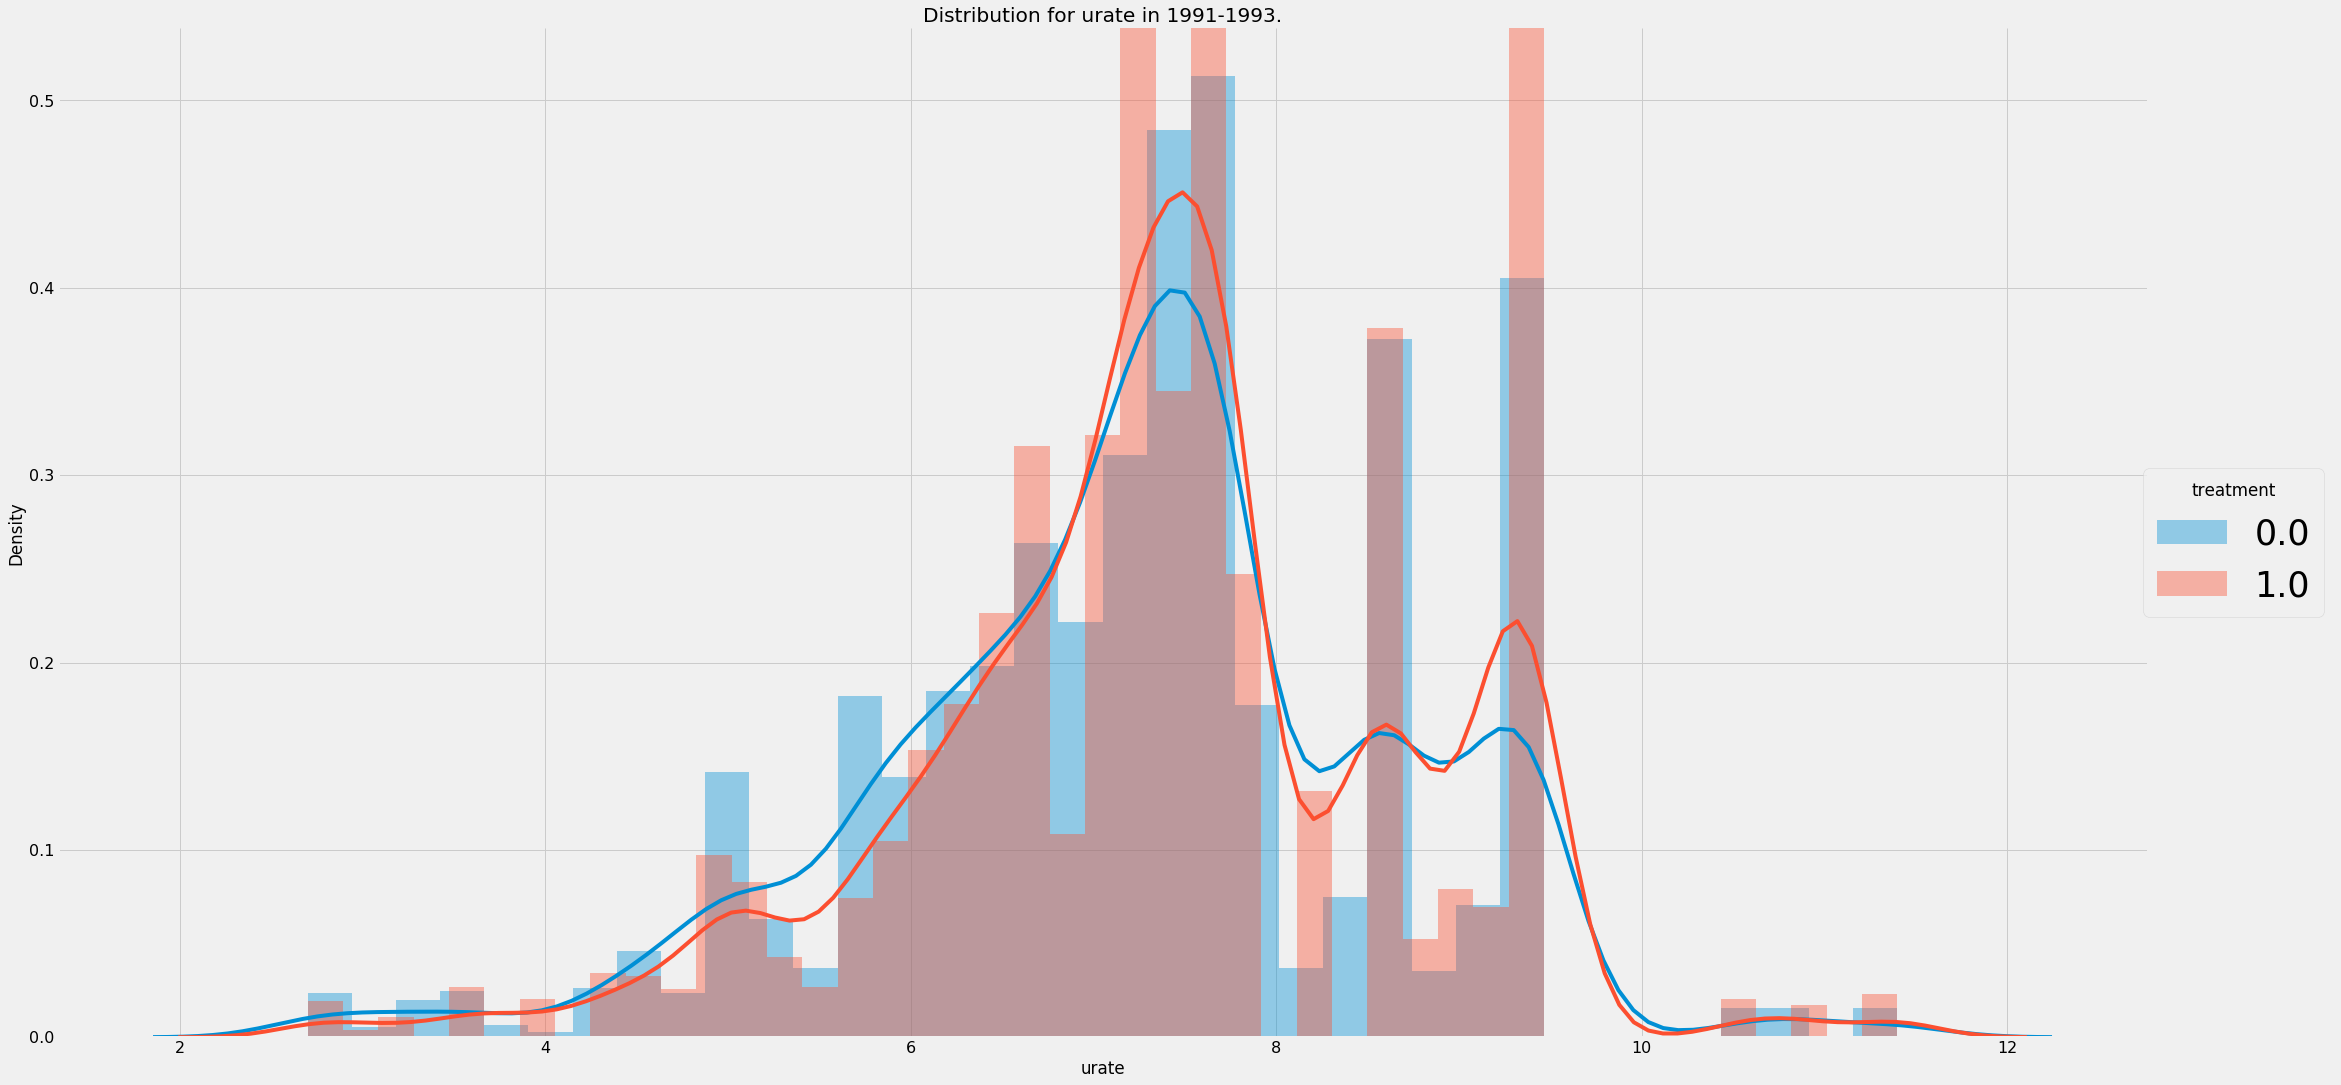

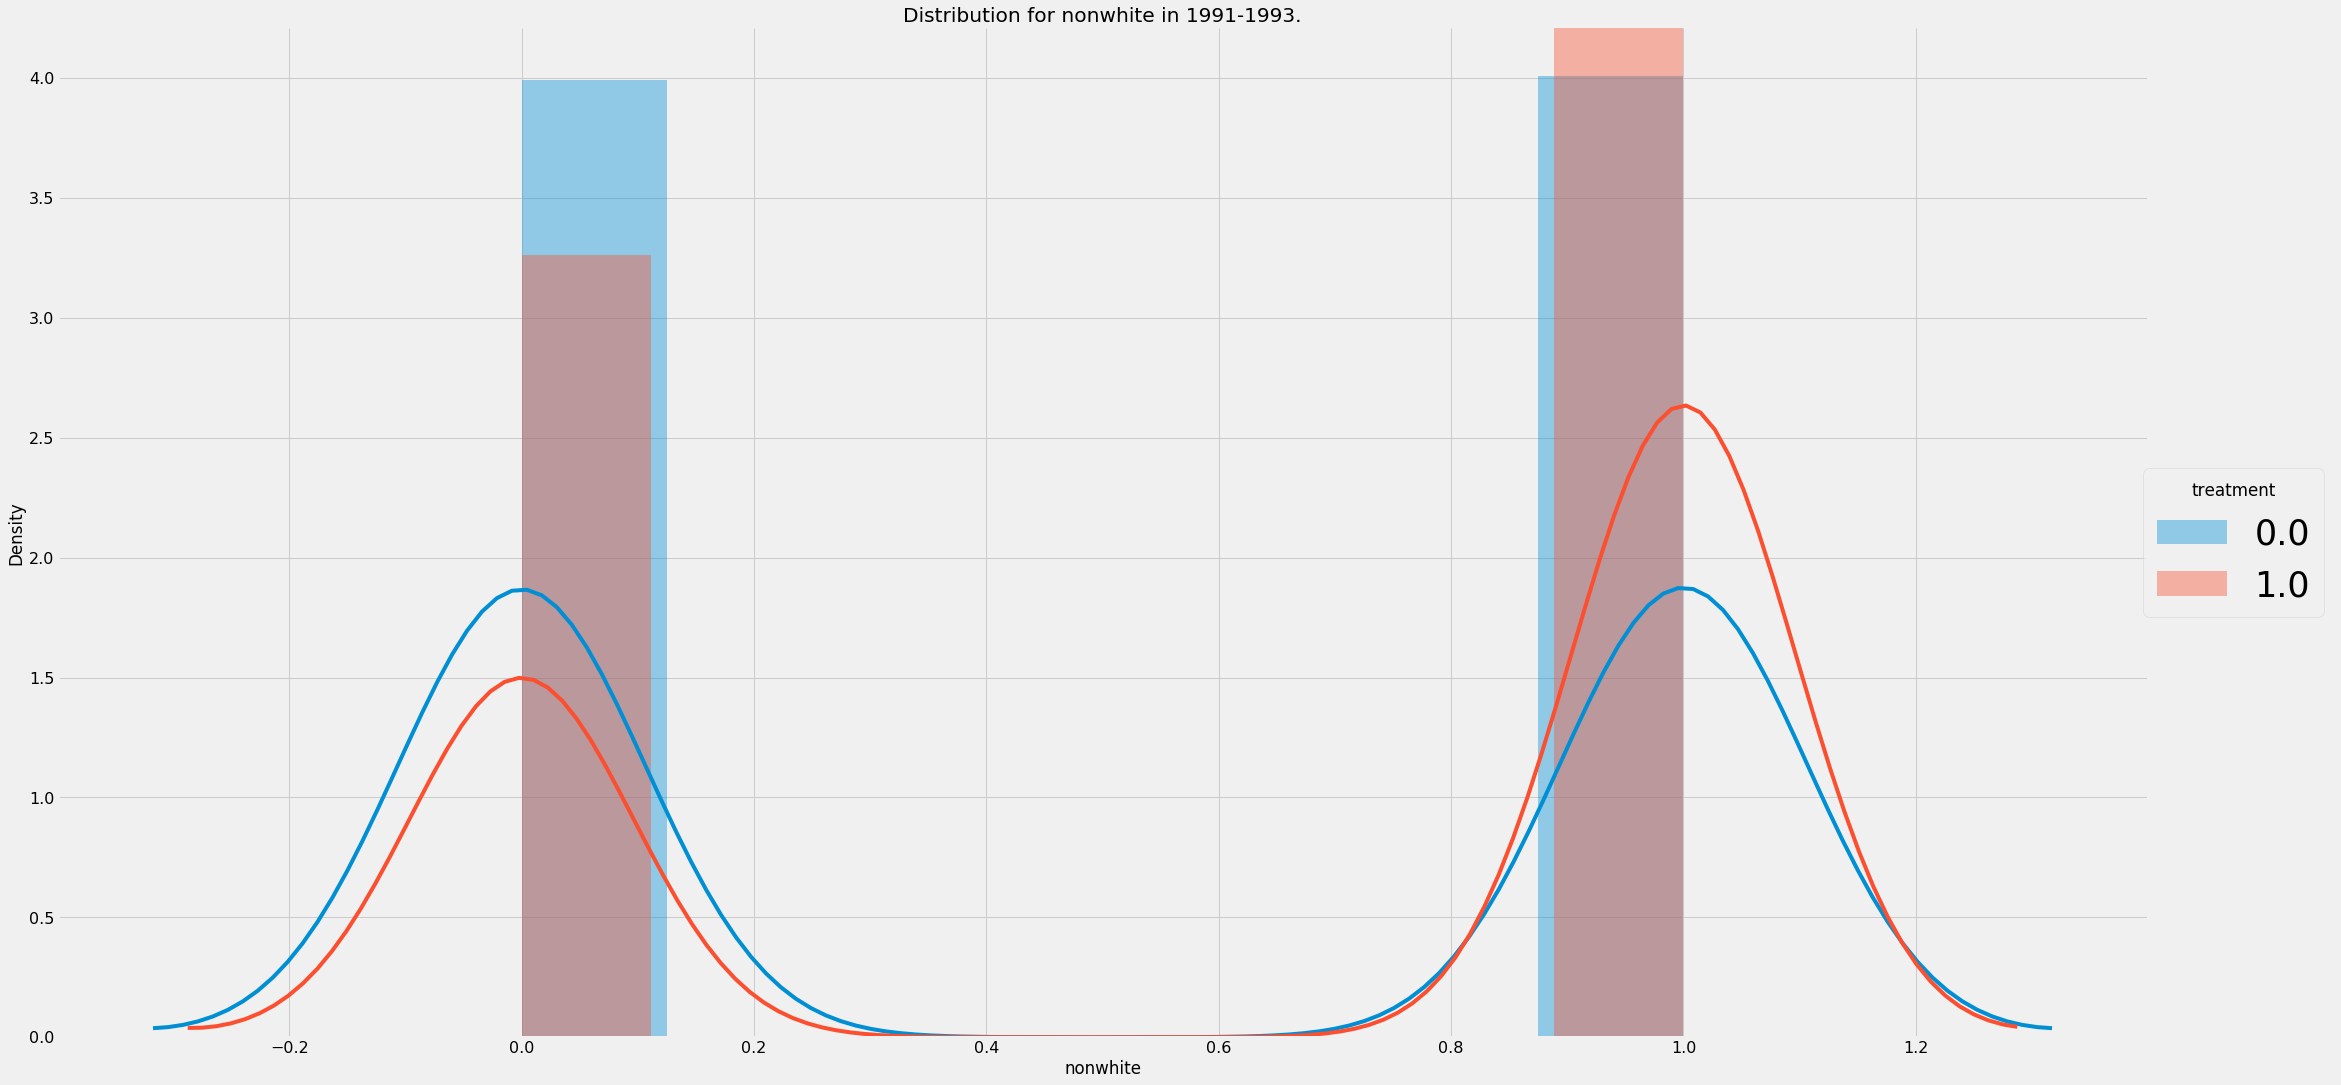

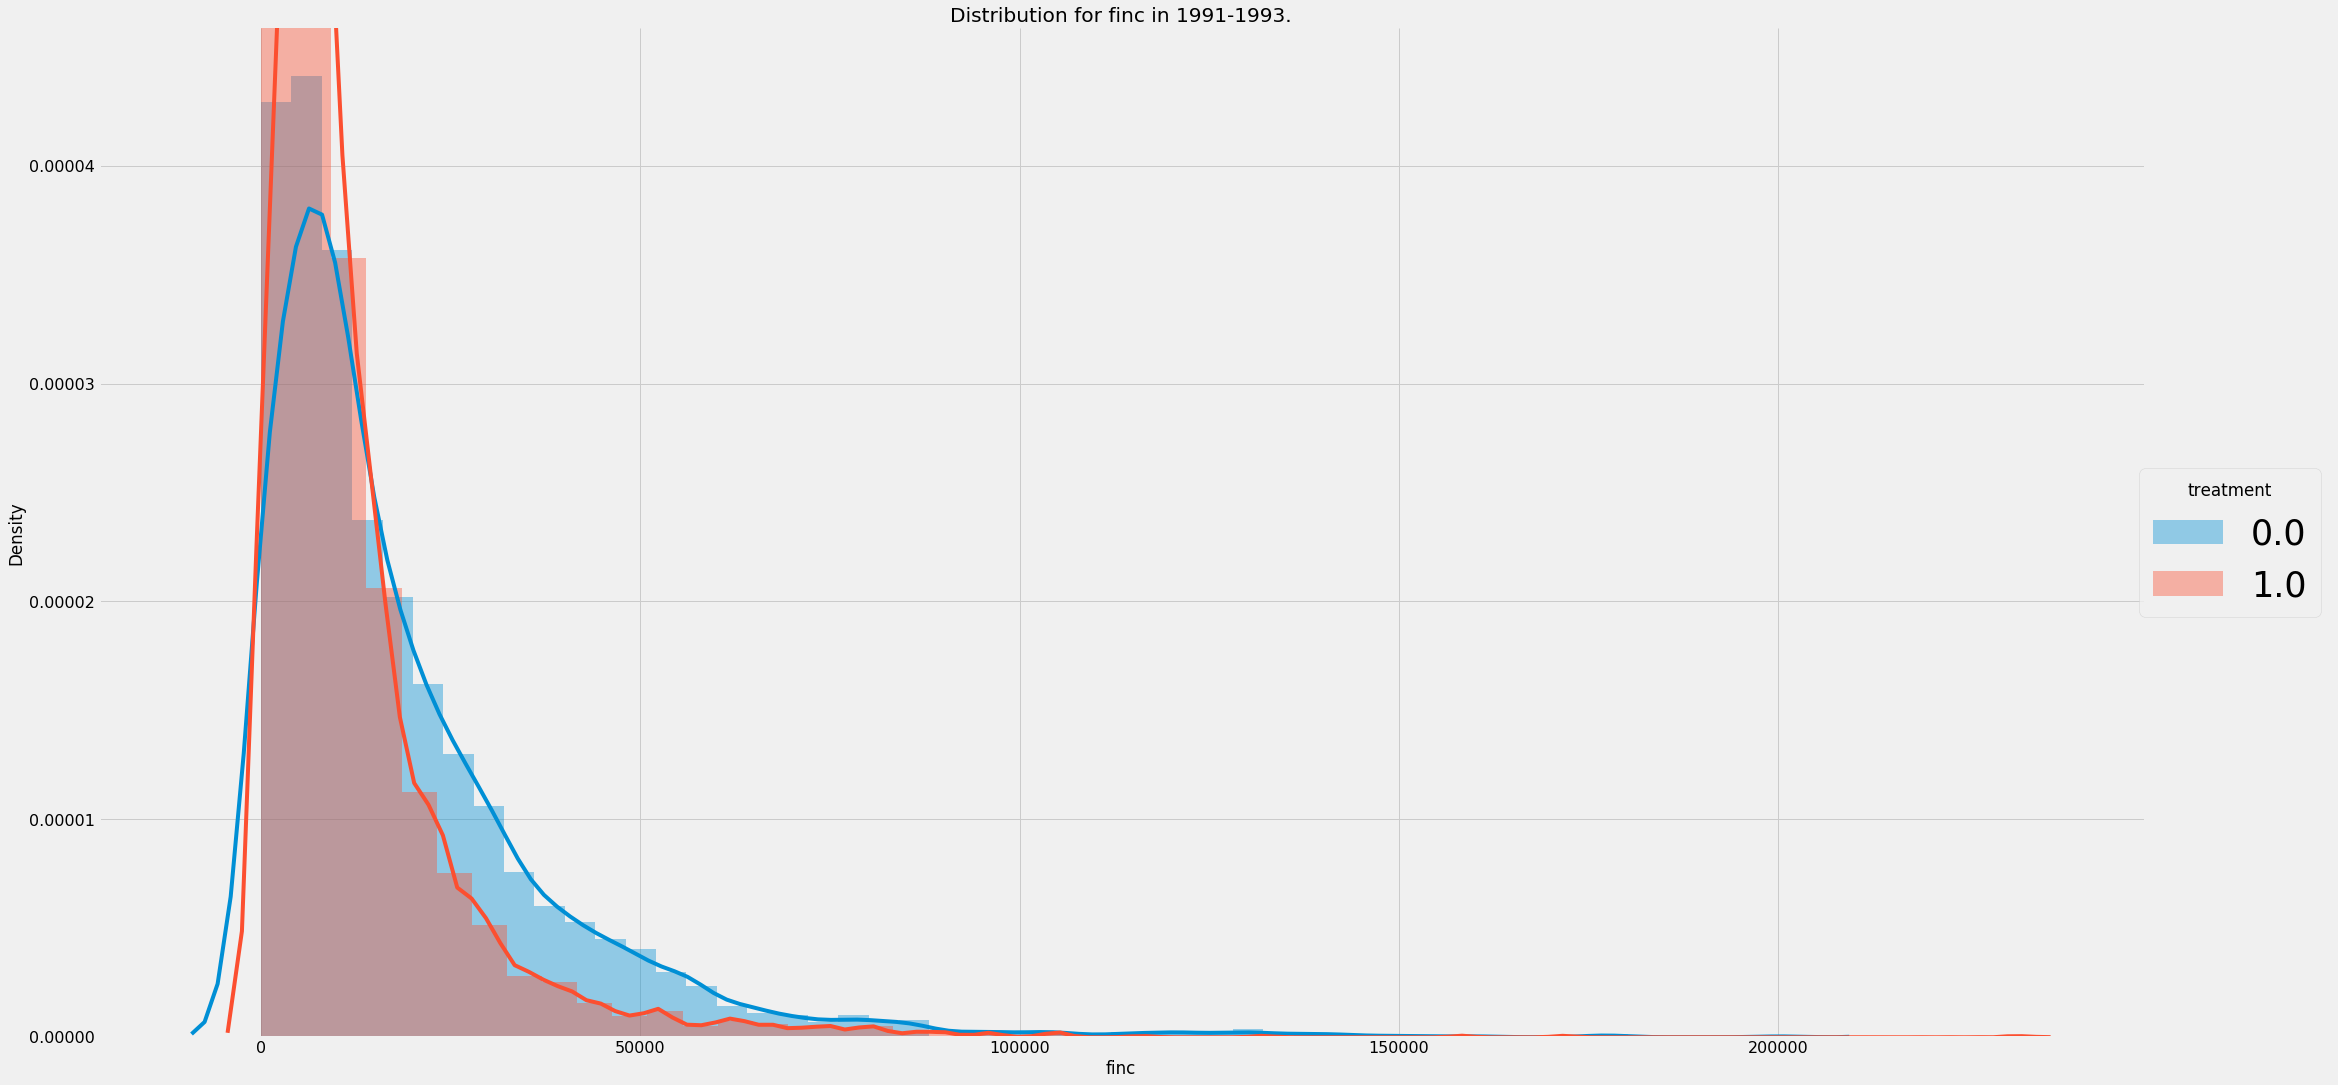

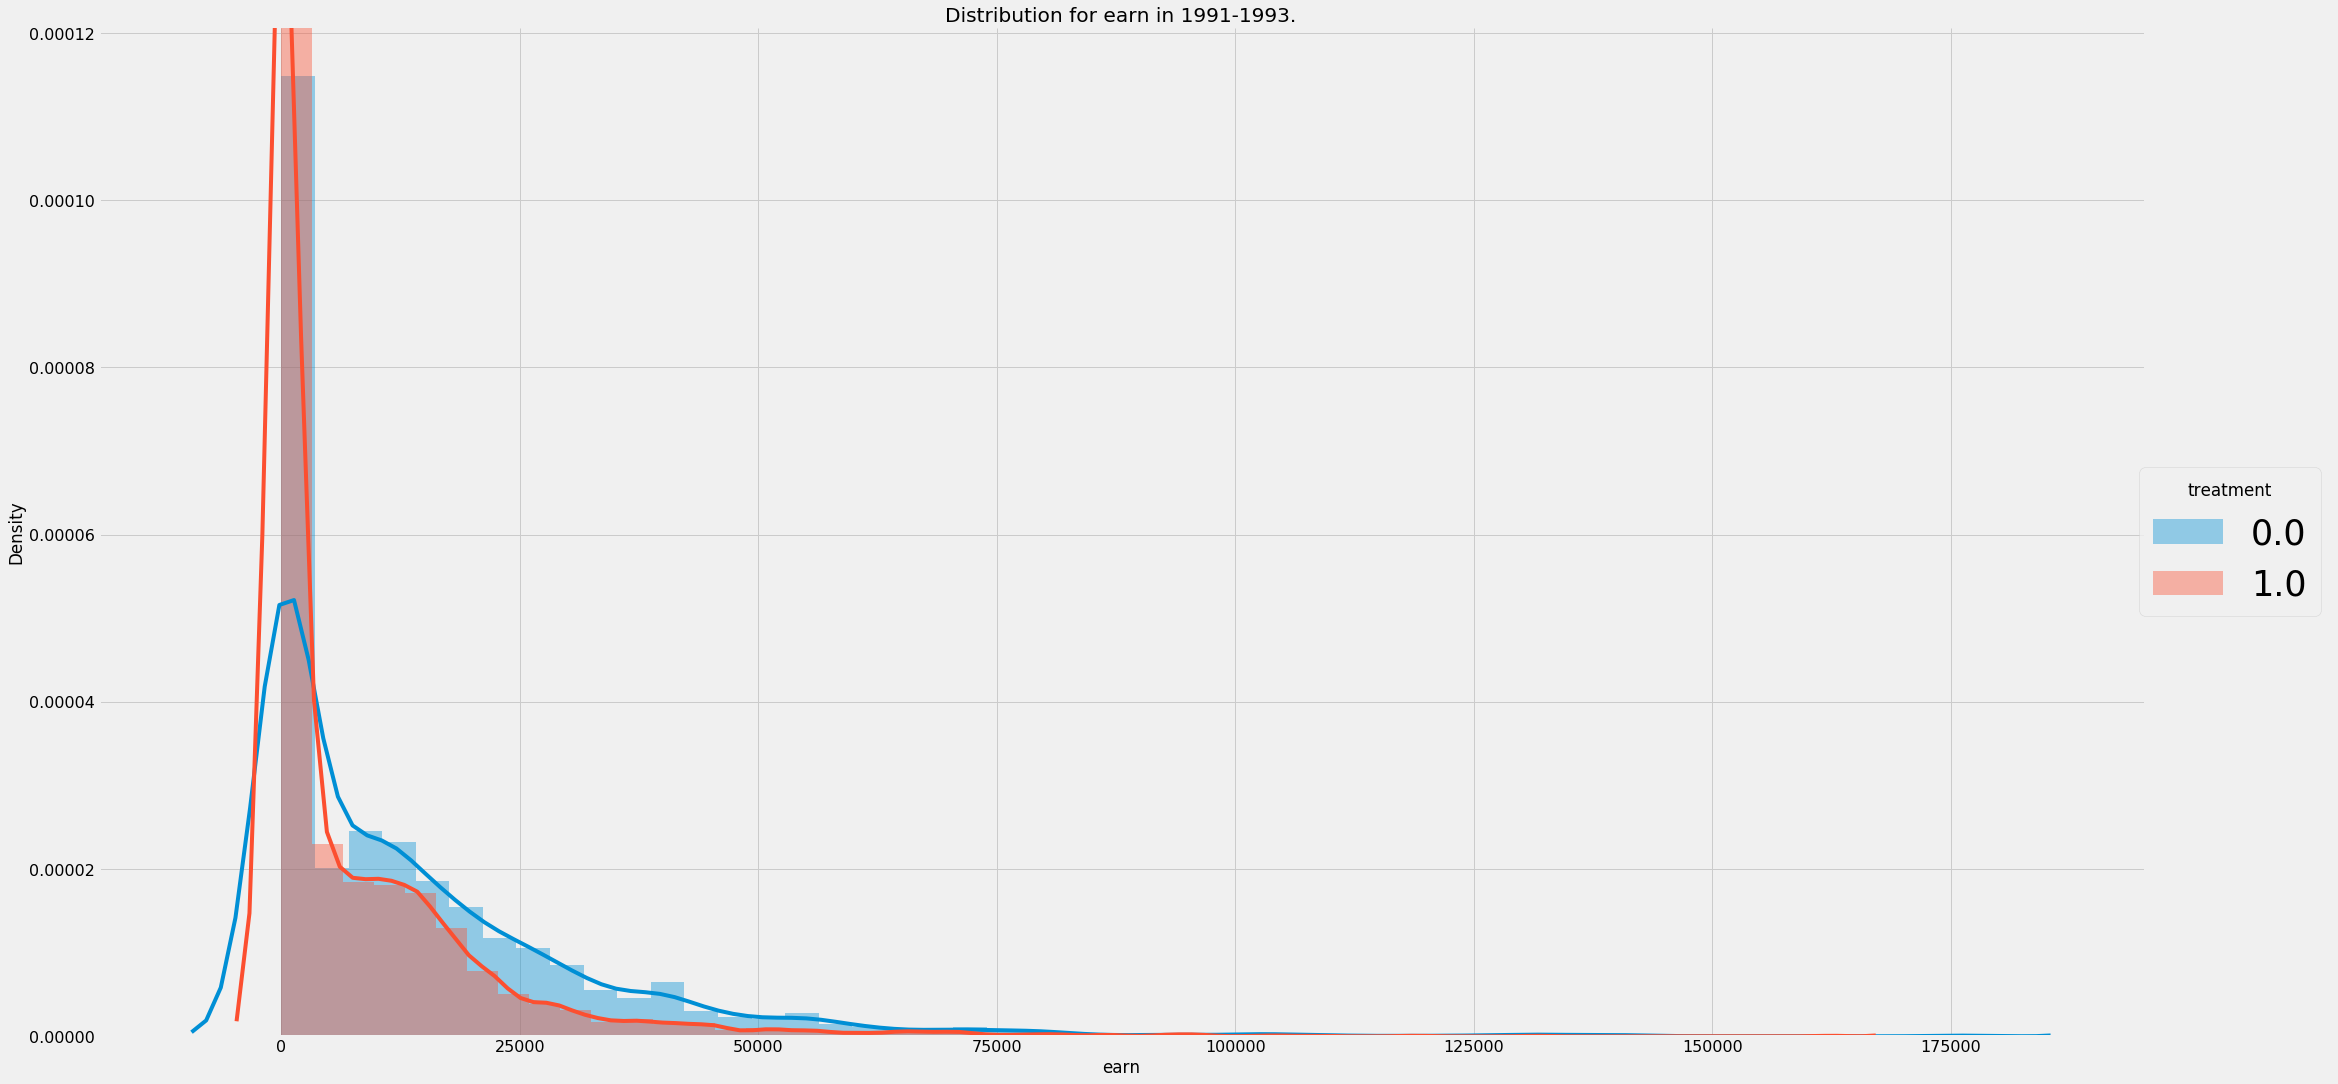

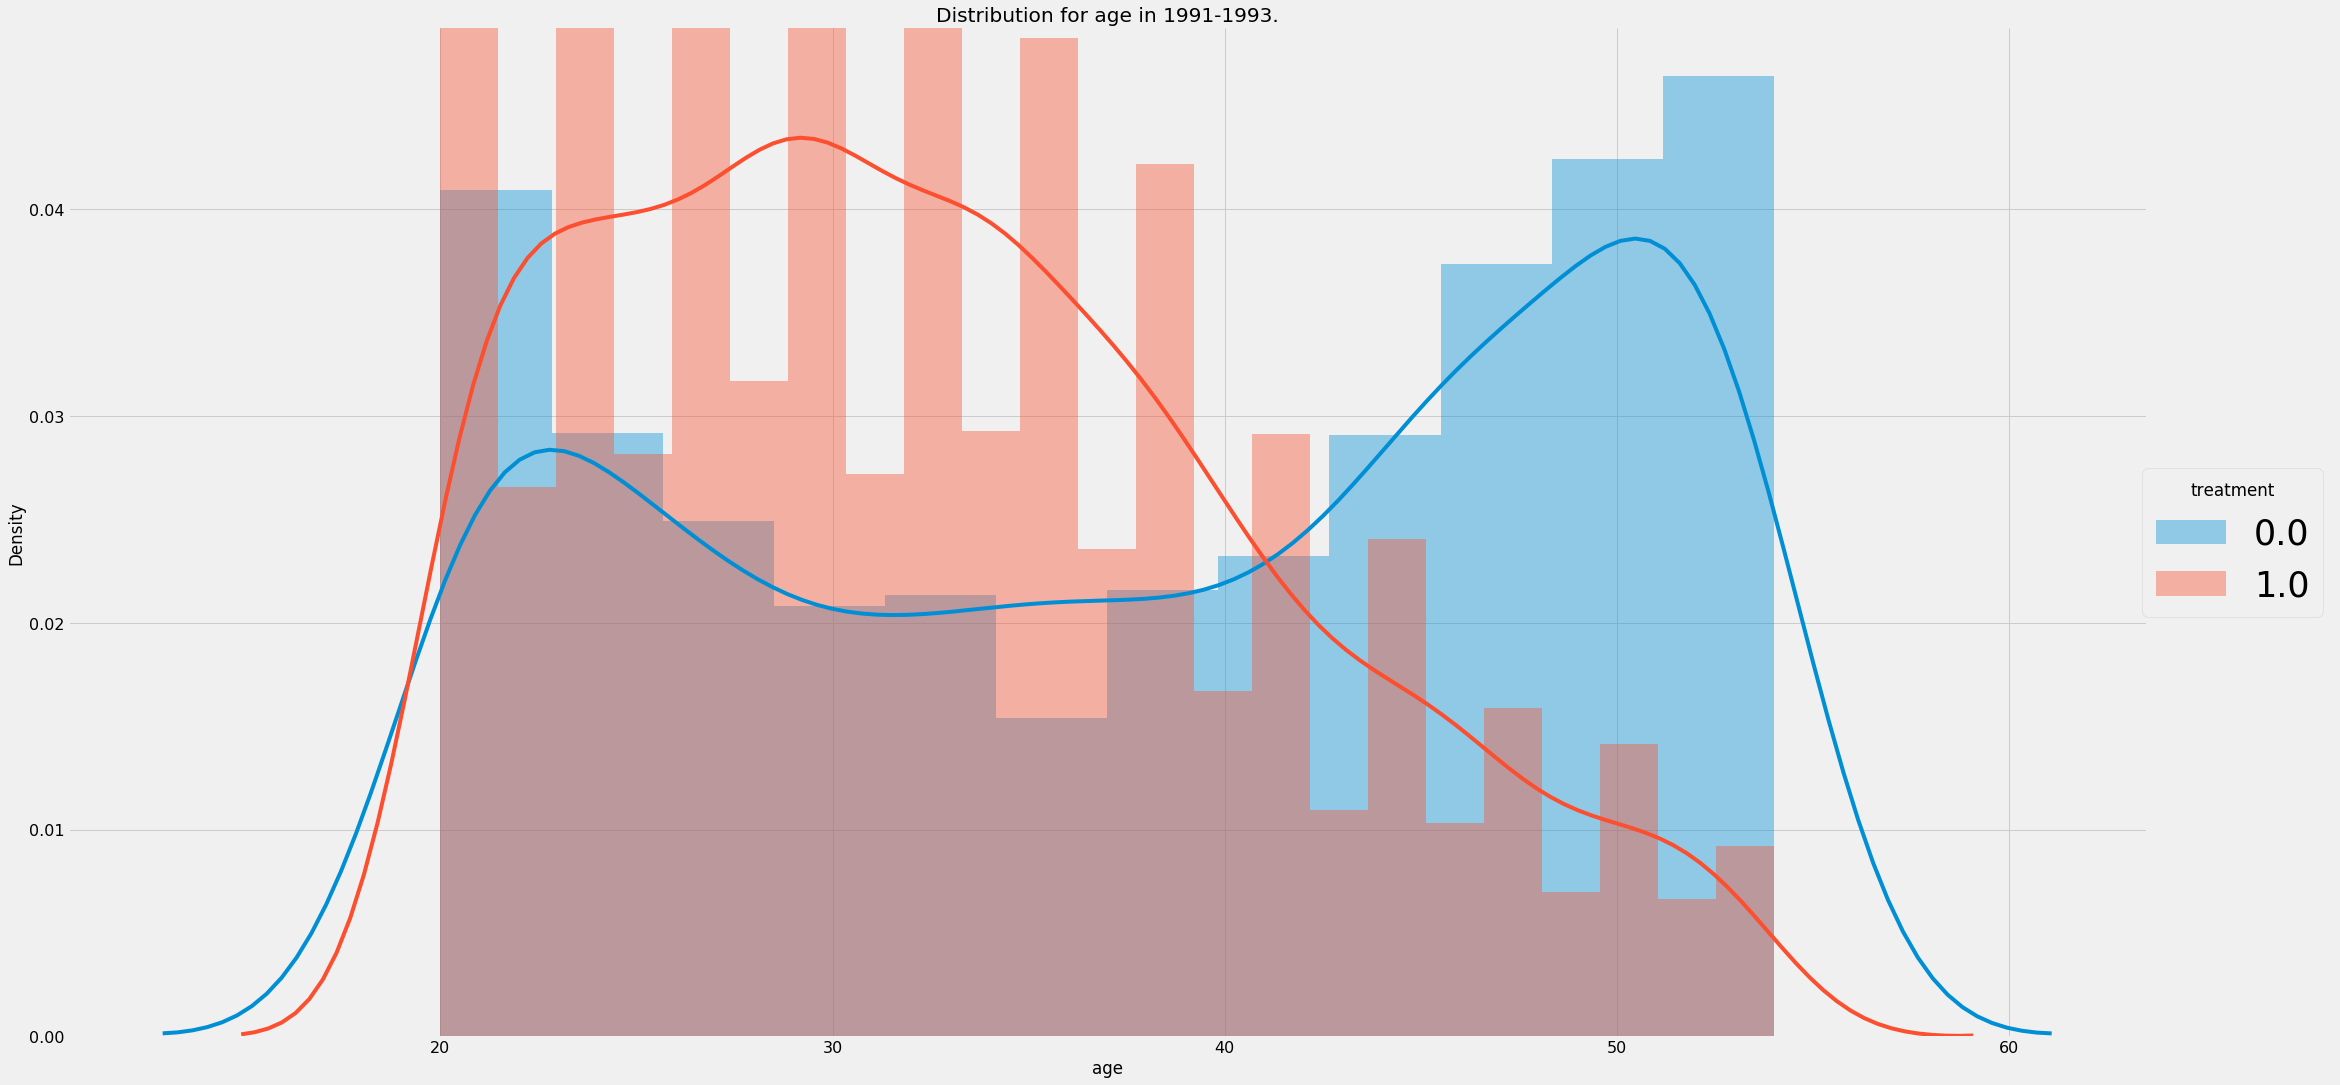

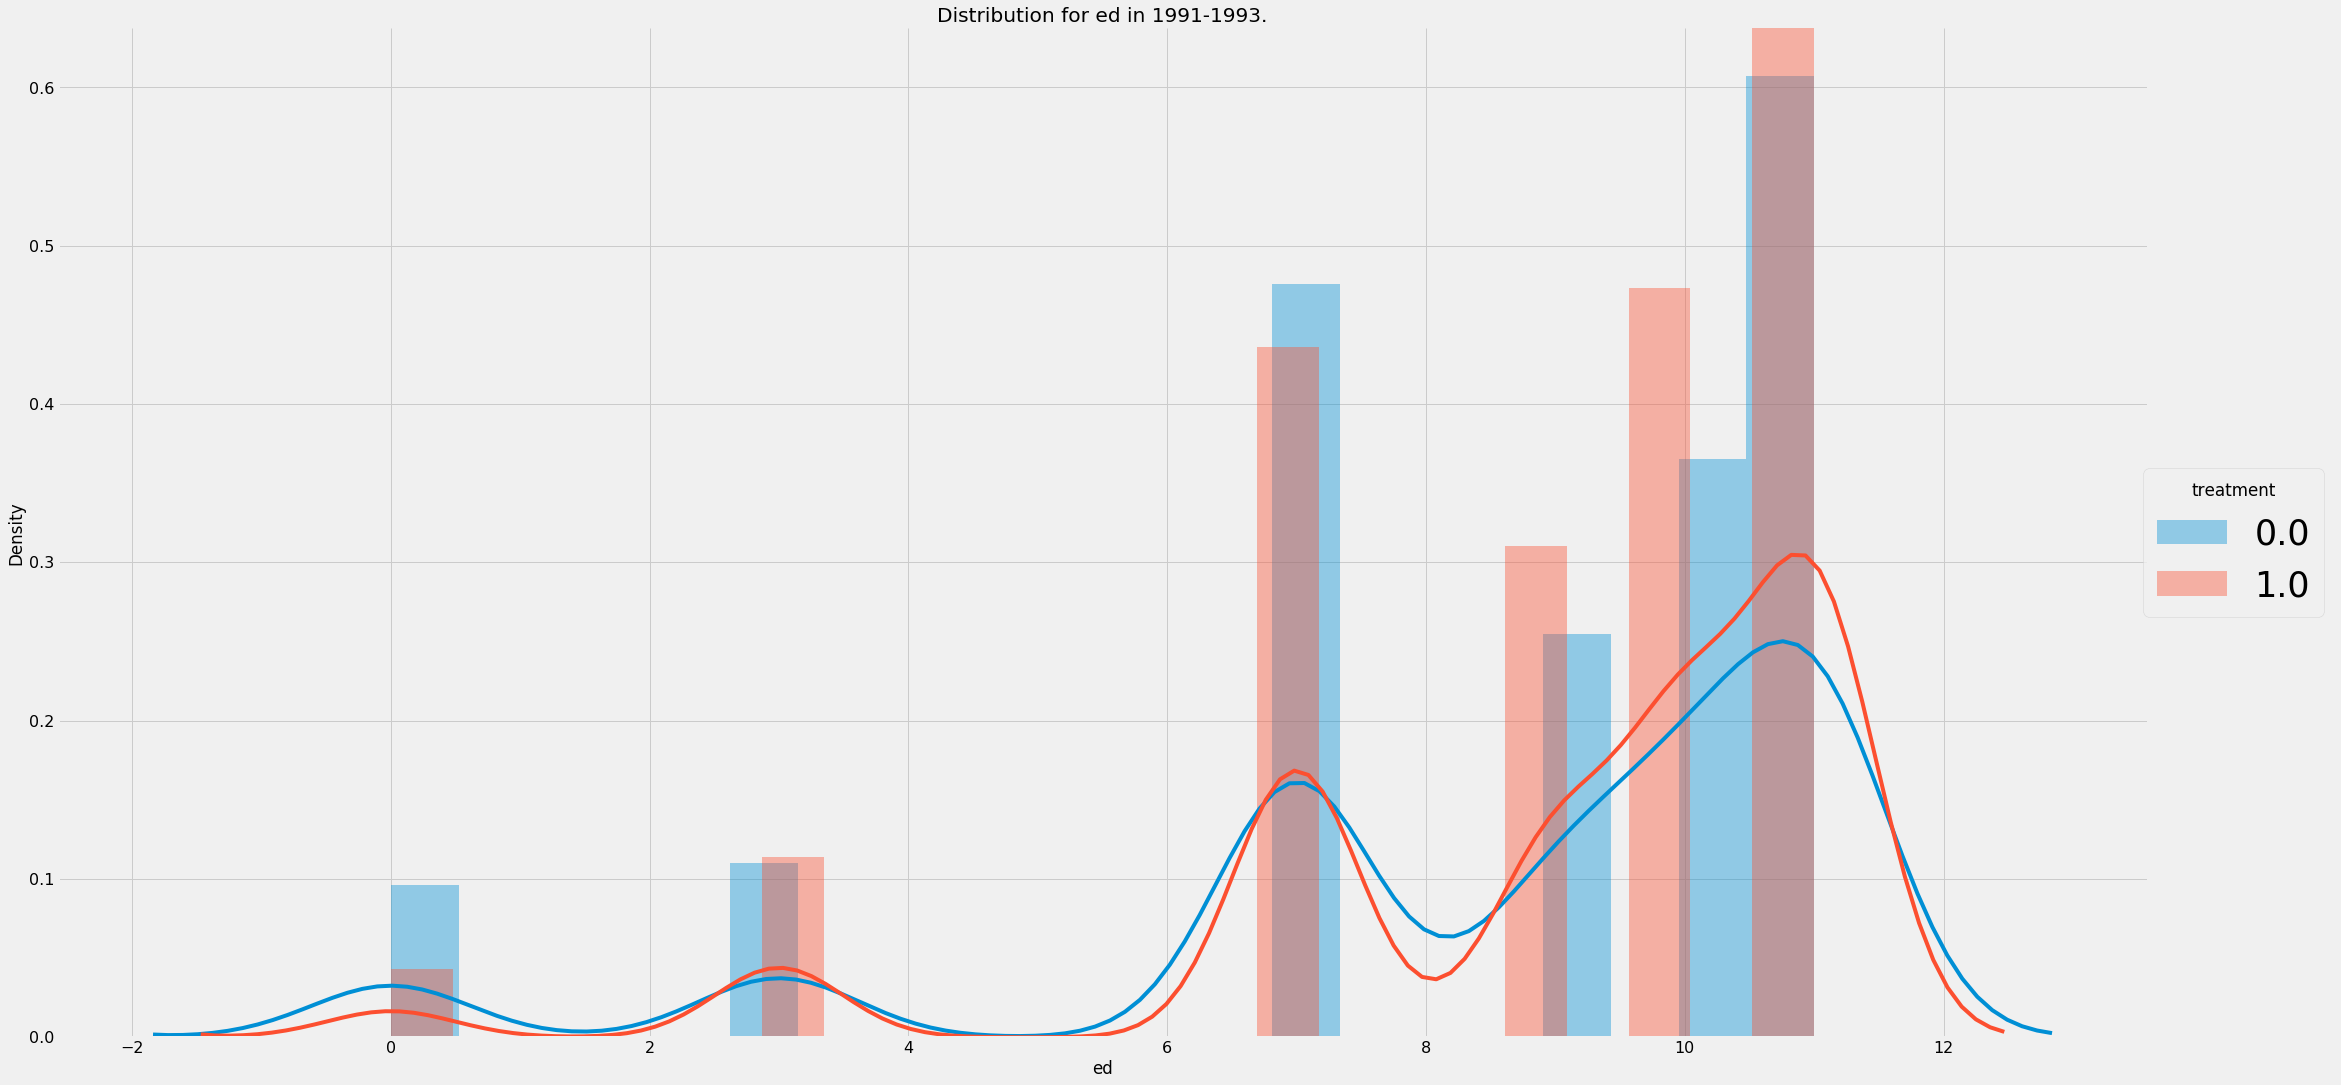

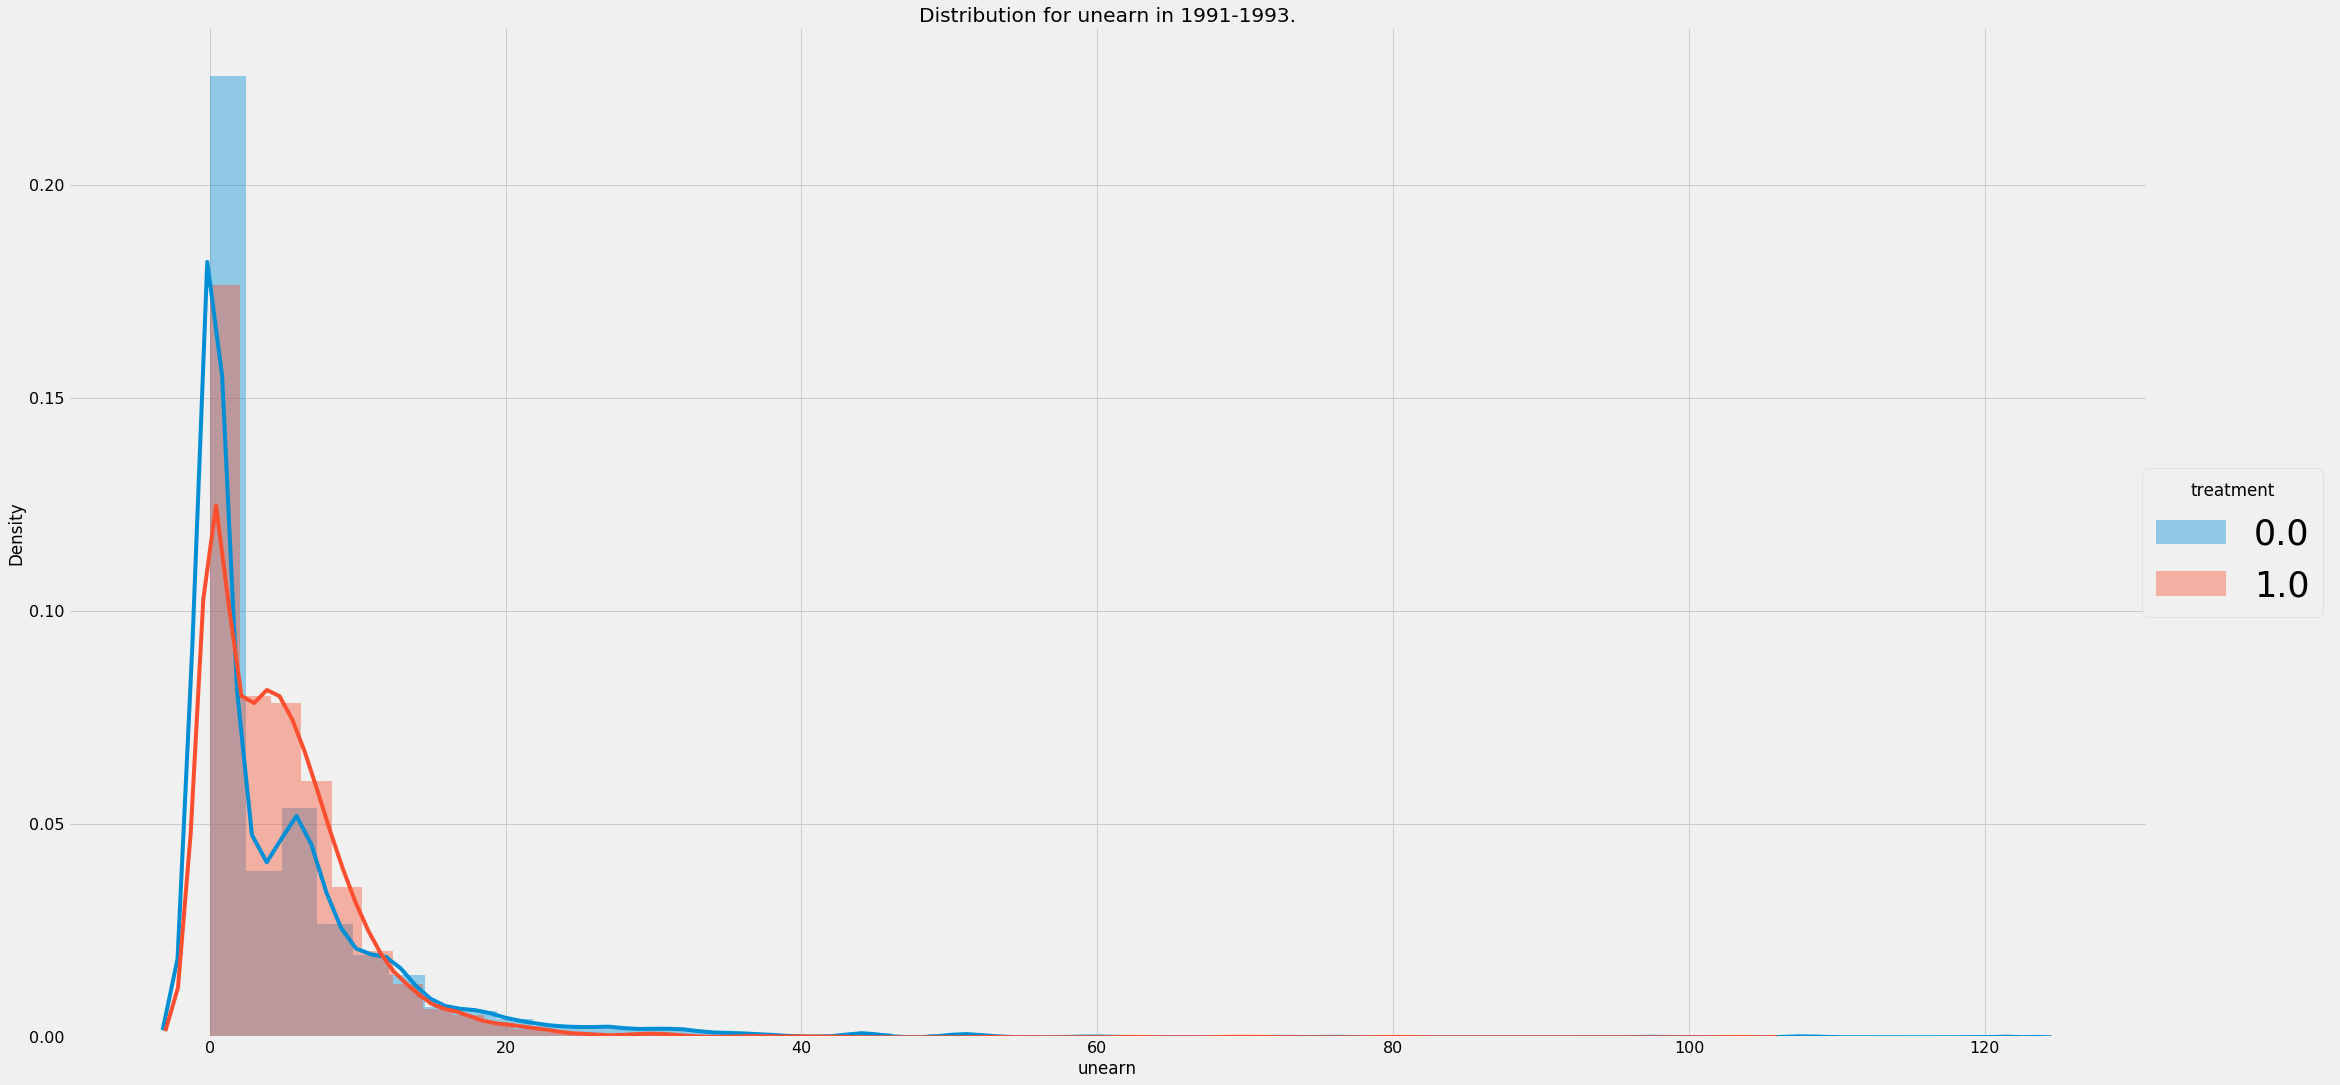

In [34]:
gen_distributions(baseline_df, baseline_charac)

In [35]:
control_df = baseline_df[baseline_df['treatment'] == 0.0]
treatment_df = baseline_df[baseline_df['treatment'] == 1.0]

temp1 = pd.DataFrame(control_df[baseline_charac].mean())
temp1.columns = ["Control Group Mean"]


temp2 = pd.DataFrame(treatment_df[baseline_charac].mean())
temp2.columns = ["Treatment Group Mean"]

temp3 = pd.DataFrame(treatment_df[baseline_charac].mean() - control_df[baseline_charac].mean())
temp3.columns = ["Difference: T - C"]

temp4 = pd.DataFrame.from_dict(gen_p_vals(treatment_df, control_df, baseline_charac), orient='index')
temp4.columns = ["P-Values: T - C"]

table = pd.concat([temp2, temp1, temp3, temp4], axis=1)

d = dict(selector="th",
    props=[('text-align', 'center')])

table.style.set_properties(**{'width':'15em', 'text-align':'center'})\
        .set_table_styles([d])

,Treatment Group Mean,Control Group Mean,Difference: T - C,P-Values: T - C
urate,7.40739,7.26503,0.142365,7.81695e-06
nonwhite,0.637391,0.500951,0.13644,3.41732e-32
finc,12029.9,18736.6,-6706.66,4.83894e-62
earn,7185.02,13798.6,-6613.54,9.15766e-70
age,32.6581,38.2679,-5.6098,6.54443e-128
ed,8.98305,8.52885,0.454195,3.75725e-13
unearn,4.84487,4.93799,-0.0931259,0.570989


In [36]:
ind = table.index

for index, value in enumerate(table['P-Values: T - C']):
    if value < 0.05:
        print()
        print(f"{ind[index]} is significant at the 5% level")
    else:
        print()
        print(f"{ind[index]} is not significant at the 5% level")


urate is significant at the 5% level

nonwhite is significant at the 5% level

finc is significant at the 5% level

earn is significant at the 5% level

age is significant at the 5% level

ed is significant at the 5% level

unearn is not significant at the 5% level


# Question 2

The parallel trends assumption is as follows:

"In the absence of treatment, the difference between the ‘treatment’ and ‘control’ group is constant over time."

This assumptions is **critical** to the DiD model as with this assumption we can use observations on treatment and control group pre and post treatment to estimate causal effect.

A violation of this trend will result in a **biased** estimate of the DiD.

From the plot below, I do not see a violation of the parallel trends assumption. It seems approriate to carry our a DiD regression analysis here.

In [37]:
#code to make interactive graph below

def parallel_trends(feature):
    
    control_df = data[data['treatment'] == 0.0]
    treatment_df = data[data['treatment'] == 1.0]
    years = data['year'].unique()

    control_means = control_df.groupby("year").mean()[feature].values
    treatment_means = treatment_df.groupby("year").mean()[feature].values

    trace0 = go.Scatter(
        x = years,
        y = treatment_means,
        name = 'Treatment',
        line = dict(
            color = ('rgb(205, 12, 24)'),
            width = 4)
    )
    trace1 = go.Scatter(
        x = years,
        y = control_means,
        name = 'Control',
        line = dict(
            color = ('rgb(22, 96, 167)'),
            width = 4,)
    )

    traces = [trace0, trace1]

    layout = dict(title = f'Parallel Trends Analysis for {feature} 1991-1996.',
                  xaxis = dict(title = 'Years'),
                  yaxis = dict(title = f'Mean {feature}'),
                  )

    fig = dict(data=traces, layout=layout)
    return iplot(fig, filename='styled-line')

In [38]:
parallel_trends("work")

# Question 3

After including the new interaction term to the regression, we see a reduction in the magnitude of our DiD estimate.

It seems that the interaction term has absorbed some of the effect previously attributed to the DiD estimate. This tells us that our previous DiD estimate was upward biased.

The coeff of the DiD estimate got smaller as did the standard error. A reduction in the standard error means we have a more precise estimate of the DiD estimate.

There is statistically significant difference for $E(Earn\ |\ Work)$ between the treatment and control group as a baseline ($years \leq 1993$).

The DiD estimate is: $0.026157418192682635$

The DiD estimate is no longer statistically significant.

In [39]:
data['earnings*work'] = data['work'] * data['earn']
# recall that for baseline calculations, we look at data from 1991-1993.
baseline_df = data[data['year'] < 1994] 

In [40]:
# E(Earn|Work) for treatment
treatment_df = baseline_df[baseline_df['treatment'] == 1.0]
treatment_df['earnings*work'].mean()

5723.433486650587

In [41]:
#E(Earn|Work) for control
control_df = baseline_df[baseline_df['treatment'] == 0.0]
control_df['earnings*work'].mean()

11522.704310265086

In [42]:
#p-value between treatment and control difference of means
ttest_ind(treatment_df['earnings*work'].values, control_df['earnings*work'].values, nan_policy='omit').pvalue

1.7493114861958118e-66

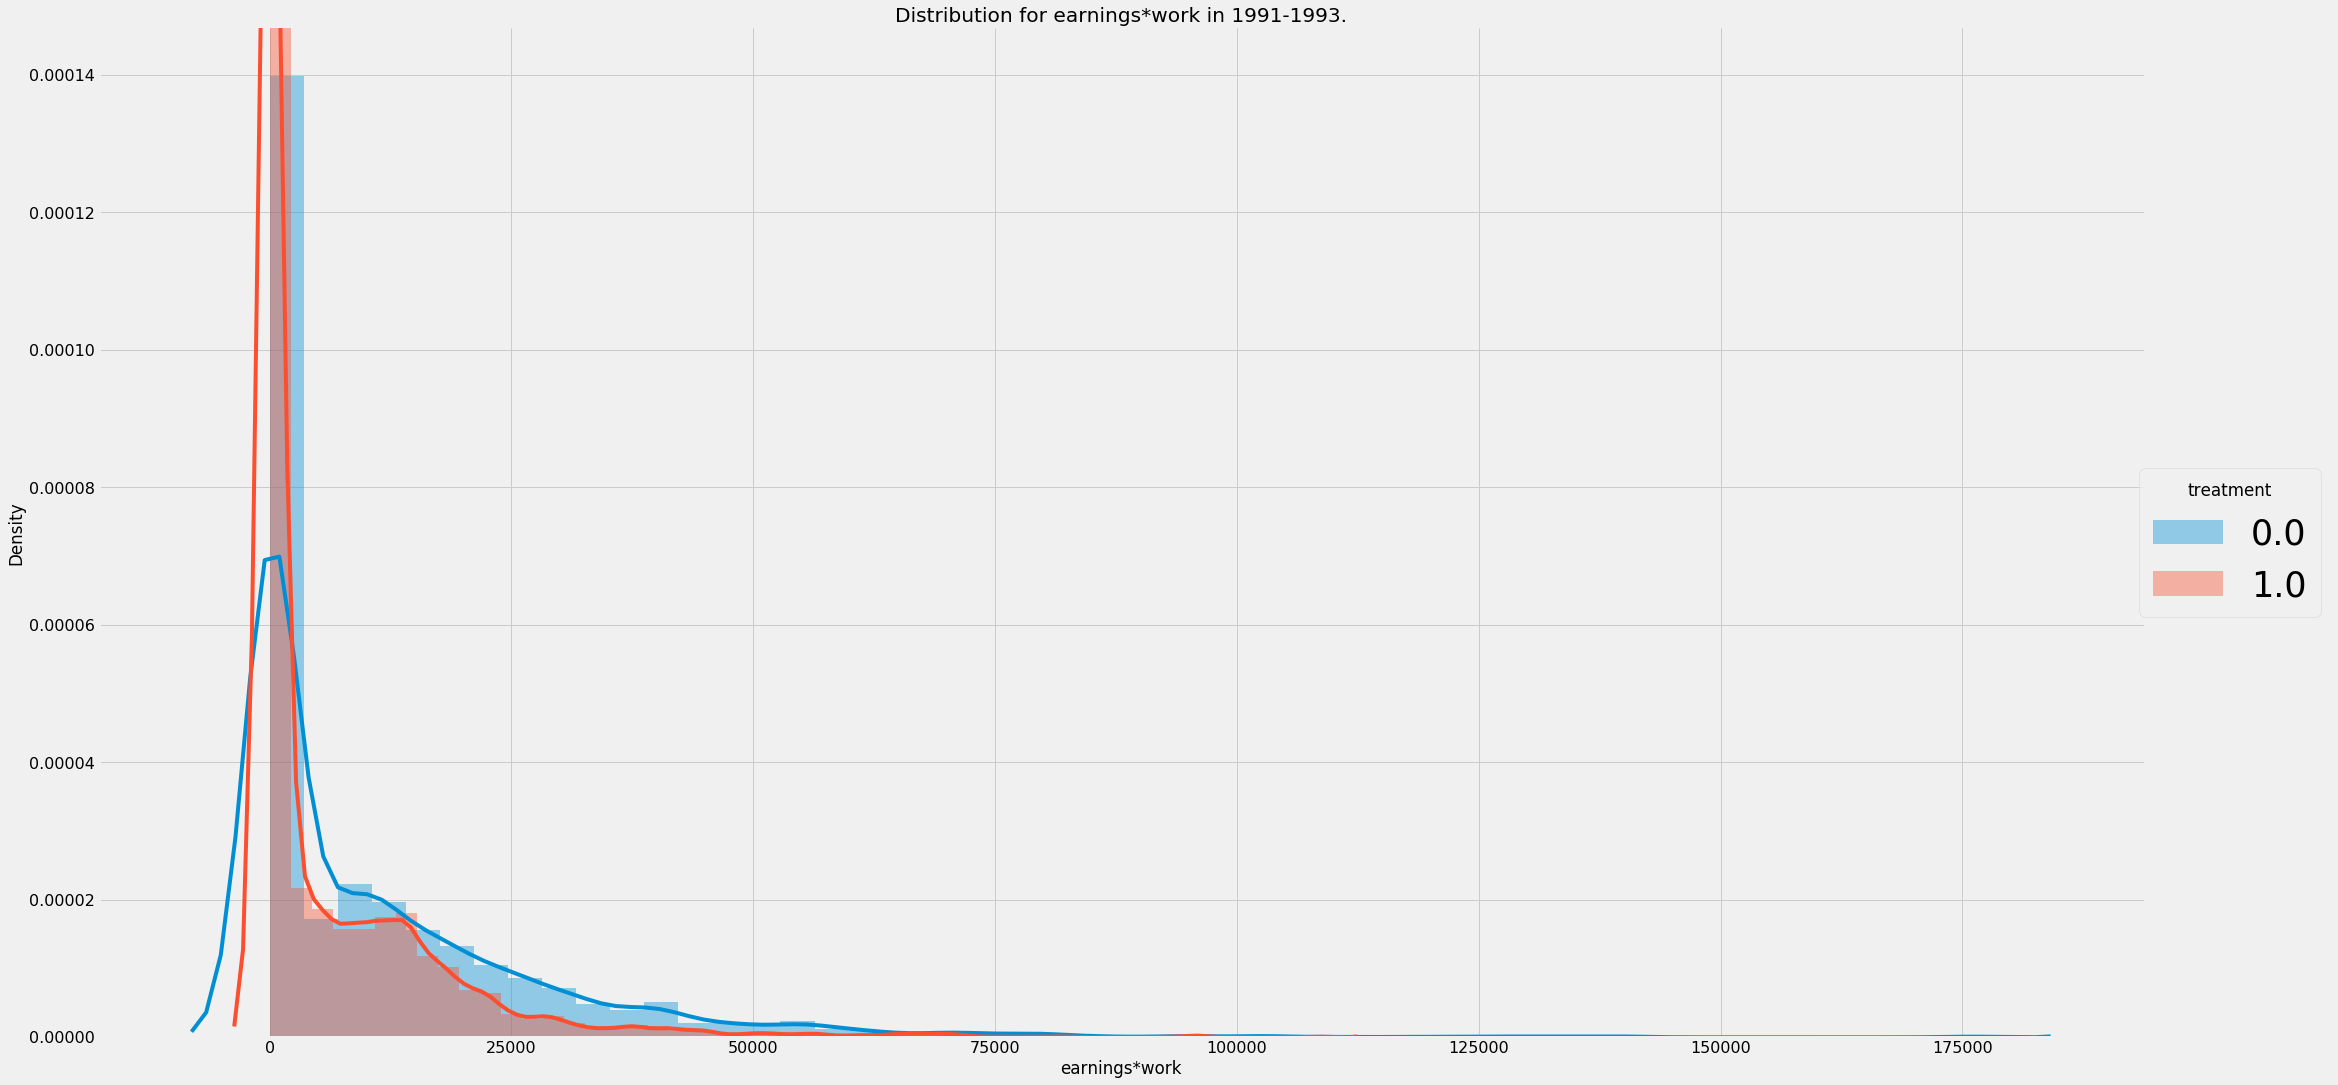

In [43]:
gen_distributions(baseline_df, ["earnings*work"])

In [44]:
indep = data[['treatment',"after", "treatment*after", 'earnings*work']].values
X = sm.add_constant(indep)
outcome = data['work'].values

model = sm.OLS(outcome, exog=X)
results3 = model.fit()
results3.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.396511,8.104687e-03,48.923694,0.000000,0.380625,0.412398
x1,-0.039435,1.020039e-02,-3.866003,0.000111,-0.059429,-0.019441
x2,0.002090,1.120035e-02,0.186637,0.851948,-0.019864,0.024045
x3,0.026157,1.486425e-02,1.759754,0.078472,-0.002979,0.055293
x4,0.000016,2.295427e-07,67.656592,0.000000,0.000015,0.000016


In [45]:
# DiD Estimate
results3.params[3]

0.026157418192682635

In [46]:
var = ['treatment',"after", "treatment*after", 'earnings*work']

for index, value in enumerate(results3.pvalues[1:]):
    if value < 0.05:
        print(f"{var[index]} is significant at the 5% level")

treatment is significant at the 5% level
earnings*work is significant at the 5% level


# Question 4

There are two reasons for including additional control variables for a DiD regression:

- Identification of the treatment effect


- Reduce the error variance

Furthermore, only information at the group level (treatment-control) is required for identification of the treatment effect as estimated by the DiD estimate.

Earlier, we saw that the folloiwing variables were unbalanced (statistically significant differences) between control and treatment:

- urate

- nonwhite

- finc

- earn

- age

- ed

As such, I will include all of the above variables in my regression formulation.

It is critical that we control for these variables as they almost certainly influence the differential trends.

My regression equation is as follows:

$$Y_i = \alpha + \beta T_i + \gamma t_i + \delta(T_i \cdot t_i) +\omega_1 (earnings*work) +\omega_2 urate + \omega_3 nonwhite + \omega_4 finc + \omega_5 earn + \omega_6 age +\omega_7 ed +  \epsilon_i$$

$\alpha$ is the constant term

$\beta$ is the treatment group specific effect

$\gamma$ is the time trend that is common to the treatment and control group

$\delta$ is the true effect of the treatment. This is the coefficient we are interested in for Difference in Differences.

$\omega_1$ is the effect of earnings, conditional on having worked in the previous year on employment. That is, the effect of conditional earnings.

$\omega_2$ is the effect of the state unemployment rate on employment.

$\omega_3$ is the effect of being nonwhite on employment.

$\omega_4$ is the effect of annual family income on employment.

$\omega_5$ is the effect of an individuals total income from wage on employment.

$\omega_6$ is the effect of an individuals age on employment.

$\omega_7$ is the effect of an individuals years of education on employment.

# Question 5

You can view the regression output below.

According to the regression output:

- $\alpha = 0.508782$

- $\beta = -0.037636$

- $\gamma = -0.017767$

- $\delta = 0.036565$

- $\omega_1 = 0.000021$

- $\omega_2 = -0.013354$

- $\omega_3 = -0.054315$

- $\omega_4 = -0.000015$

- $\omega_5 = 0.000008$

- $\omega_6 = 0.001498$

- $\omega_7 = 0.006353$

$\delta$ is the difference in employment for women with 1 or more children in 1994 vs 1993 minus the difference in employment for women with no children in 1994 vs 1993.

Controlling for additional covariates increased our DiD estiamte and reduced it's standard error (increased precision).

I think that the addition of covariates accounted for the effect heterogeneity. The DiD estimate is now statistically significant.

I think this will be the best model of for our DiD estimate in the entire homework.

In [47]:
# data['age*age'] = data['age'] * data['age']
indep = data[['treatment',"after", "treatment*after", "earnings*work",
              'urate','nonwhite','finc','earn','age','ed']].values
X = sm.add_constant(indep)
outcome = data['work'].values

model = sm.OLS(outcome, exog=X)
results5 = model.fit()
results5.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.508782,2.959408e-02,17.192029,1.476637e-65,0.450774,0.566791
x1,-0.037636,9.970296e-03,-3.774846,1.607806e-04,-0.057179,-0.018093
x2,-0.017767,1.123276e-02,-1.581730,1.137342e-01,-0.039785,0.004251
x3,0.036565,1.413174e-02,2.587410,9.680219e-03,0.008864,0.064265
x4,0.000021,3.948356e-07,52.930118,0.000000e+00,0.000020,0.000022
x5,-0.013354,2.743481e-03,-4.867471,1.142916e-06,-0.018731,-0.007976
x6,-0.054315,7.488500e-03,-7.253151,4.289796e-13,-0.068994,-0.039637
x7,-0.000015,4.977992e-07,-29.336301,1.540000e-183,-0.000016,-0.000014
x8,0.000008,6.327437e-07,12.850216,1.411756e-37,0.000007,0.000009
x9,0.001498,3.644443e-04,4.111225,3.958536e-05,0.000784,0.002213


In [48]:
var = ['treatment',"after", "treatment*after", "earnings*work",'urate','nonwhite','finc','earn','age','ed']
for index, value in enumerate(results5.pvalues[1:]):
    if value < 0.05:
        print(f"{var[index]} is significant at the 5% level")

treatment is significant at the 5% level
treatment*after is significant at the 5% level
earnings*work is significant at the 5% level
urate is significant at the 5% level
nonwhite is significant at the 5% level
finc is significant at the 5% level
earn is significant at the 5% level
age is significant at the 5% level
ed is significant at the 5% level


In [49]:
# DiD Estimate
results5.params[3]

0.036564611227585919

# Question 6

My regression equation is as follows:

$$Y_i = \alpha + \beta T_i + \gamma t_i + \delta(T_i \cdot t_i) +\omega_1 (earnings*work) +\omega_2 urate + \omega_3 nonwhite + \omega_4 finc + \omega_5 earn + \omega_6 age +\omega_7 ed + \omega_8 (urate*treatment) + \epsilon_i$$

Our estimate for the DiD got smaller. The Standard Error Increased.

Furthermore, the DiD estimate is no longer statistically significant.

The DiD estimate is: 0.02760886181938452

In [50]:
data["urate*treatment"] = data['urate'] * data['treatment']
indep = data[['treatment',"after", "treatment*after","earnings*work",'urate','nonwhite', 'finc','earn', 'age','ed',
              "urate*treatment"]].values
X = sm.add_constant(indep)
outcome = data['work'].values

model = sm.OLS(outcome, exog=X)
results6 = model.fit()
results6.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.480237,3.663866e-02,13.107391,5.120789e-39,0.408421,0.552054
x1,0.014221,4.049031e-02,0.351227,7.254238e-01,-0.065145,0.093588
x2,-0.012724,1.186323e-02,-1.072516,2.835070e-01,-0.035977,0.010530
x3,0.027609,1.567251e-02,1.761611,7.815733e-02,-0.003111,0.058329
x4,0.000021,3.948259e-07,52.934404,0.000000e+00,0.000020,0.000022
x5,-0.009431,4.042204e-03,-2.333110,1.965673e-02,-0.017354,-0.001508
x6,-0.054364,7.488390e-03,-7.259824,4.084197e-13,-0.069043,-0.039686
x7,-0.000015,4.977881e-07,-29.332835,1.696347e-183,-0.000016,-0.000014
x8,0.000008,6.327408e-07,12.841396,1.580112e-37,0.000007,0.000009
x9,0.001516,3.646838e-04,4.157392,3.238541e-05,0.000801,0.002231


In [51]:
#DiD Estimate
results6.params[3]

0.02760886181938452

In [52]:
var = ['treatment',"after", "treatment*after","earnings*work",'urate','nonwhite','finc','earn', 'age','ed',"urate*treatment"]

for index, value in enumerate(results6.pvalues[1:]):
    if value < 0.05:
        print(f"{var[index]} is significant at the 5% level")

earnings*work is significant at the 5% level
urate is significant at the 5% level
nonwhite is significant at the 5% level
finc is significant at the 5% level
earn is significant at the 5% level
age is significant at the 5% level
ed is significant at the 5% level


# Question 7
My regression equation is as follows:

$$Y_i = \alpha + \beta T_i + \gamma t_i + \delta(T_i \cdot t_i) +\omega_1 (earnings*work) +\omega_2 urate + \omega_3 nonwhite + \omega_4 finc + \omega_5 earn + \omega_6 age +\omega_7 ed + \omega_8 (urate*treatment) + \omega_9 (new\_treatment) + \omega_{10}(new\_interaction) + \epsilon_i$$


# Question 8

Our estimate became even smaller with a much sharper increase in standard error (less precise).

The DiD estimate is still not significant!

I do not constitute the steps we took in Questions 6 & 8 as improving our DiD estimate.

The new dummy treatment variable was calculated on the basis of the old treatment dummy variable - it works as follows:

| Treatment Dummy | New Treatment Dummy   | Meaning |
|------|------|------|
|   0  | 0    | no kids    |
|   1  | 0    | 1 kid|
|   1  | 1    | 2+ kids|
|   0  | 1    | Not a possible combination|

In [53]:
new_treatment = []
children_data = data['children'].values
for index, val in enumerate(data['treatment']):
    if val == 1.0:
        if children_data[index] == 1.0:
            new_treatment.append(0.0)
        if children_data[index] > 1.0:
            new_treatment.append(1.0)
    else:
        new_treatment.append(0.0)

data['new_treatment'] = new_treatment
data['new_interaction'] = data['new_treatment'] * data['after']

In [56]:
data[["treatment","new_treatment", "after", "new_interaction"]].tail() #snapshot of the data

,treatment,new_treatment,after,new_interaction
13741,0.0,0.0,1.0,0.0
13742,0.0,0.0,1.0,0.0
13743,1.0,1.0,1.0,1.0
13744,0.0,0.0,1.0,0.0
13745,1.0,0.0,1.0,0.0


In [57]:
indep = data[['treatment',"after", "treatment*after","earnings*work",'urate','nonwhite', 'finc','earn', 'age','ed',"urate*treatment",
 "new_treatment", "new_interaction"]].values

X = sm.add_constant(indep)
outcome = data['work'].values

model = sm.OLS(outcome, exog=X)
results8 = model.fit()
results8.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.485173,3.662221e-02,13.248052,8.126299e-40,0.413388,0.556958
x1,0.046211,4.102541e-02,1.126394,2.600185e-01,-0.034205,0.126626
x2,-0.013201,1.185288e-02,-1.113727,2.654160e-01,-0.036434,0.010032
x3,0.008917,1.941537e-02,0.459265,6.460514e-01,-0.029140,0.046974
x4,0.000021,3.944994e-07,52.913985,0.000000e+00,0.000020,0.000022
x5,-0.009799,4.039211e-03,-2.425907,1.528297e-02,-0.017716,-0.001881
x6,-0.050832,7.513945e-03,-6.764996,1.387110e-11,-0.065560,-0.036103
x7,-0.000014,4.989360e-07,-28.868249,5.851558e-178,-0.000015,-0.000013
x8,0.000008,6.340549e-07,12.445721,2.288978e-35,0.000007,0.000009
x9,0.001386,3.653266e-04,3.794401,1.486354e-04,0.000670,0.002102


In [58]:
#DiD Estimate
results8.params[3]

0.0089167915736494095

In [59]:
var = ['treatment',"after", "treatment*after","earnings*work",'urate','nonwhite', 'finc','earn', 'age','ed',
       "urate*treatment", "new_treatment", "new_interaction"]

for index, value in enumerate(results8.pvalues[1:]):
    if value < 0.05:
        print(f"{var[index]} is significant at the 5% level")

earnings*work is significant at the 5% level
urate is significant at the 5% level
nonwhite is significant at the 5% level
finc is significant at the 5% level
earn is significant at the 5% level
age is significant at the 5% level
ed is significant at the 5% level
new_treatment is significant at the 5% level


# Question 9

Our best DiD estime, in terms of standard error was from the regression we calculated in Question 5 Part 2. See table below for `question_5_coeffs_part_2`

The DiD estimate was 0.036565 and was statistically significant.

Subsequent regressions **did not** improve our DiD estimate.

I believe it was necessary to control for more demographic factors as this is what led to an improved estimate that was statistically significant.

If possible, I would request more **group** level data (i.e. state level characteristics) and include them in my regression.

**The X3 variable is the DiD estimate in all of the output tables below**

In [60]:
question_4_coeffs_part_1 = results4.summary2().tables[1]
question_3_coeffs_part_2 = results3.summary2().tables[1]
question_5_coeffs_part_2 = results5.summary2().tables[1]
question_6_coeffs_part_2 = results6.summary2().tables[1]
question_8_coeffs_part_2 = results8.summary2().tables[1]

In [61]:
#my own version of star gazer.

class StarGazer(object):
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [62]:
StarGazer("question_4_coeffs_part_1","question_3_coeffs_part_2", 
        "question_5_coeffs_part_2", "question_6_coeffs_part_2", "question_8_coeffs_part_2")

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.575460,0.008845,65.059883,0.000000e+00,0.558122,0.592797
x1,-0.129498,0.011676,-11.090648,1.839206e-28,-0.152385,-0.106611
x2,-0.002074,0.012931,-0.160347,8.726098e-01,-0.027421,0.023274
x3,0.046873,0.017158,2.731833,6.306339e-03,0.013241,0.080505
,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.396511,8.104687e-03,48.923694,0.000000,0.380625,0.412398
x1,-0.039435,1.020039e-02,-3.866003,0.000111,-0.059429,-0.019441
x2,0.002090,1.120035e-02,0.186637,0.851948,-0.019864,0.024045
x3,0.026157,1.486425e-02,1.759754,0.078472,-0.002979,0.055293
x4,0.000016,2.295427e-07,67.656592,0.000000,0.000015,0.000016
